In [1]:
import pandas as pd
from evaluation.generated_dataset import GeneratedDataset

/home/kna/.cache/pypoetry/virtualenvs/wyckofftransformer-FeCwefly-py3.12/lib/python3.12/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


In [2]:
mp_20 = pd.concat([
    GeneratedDataset.from_cache(('split', 'train'), 'mp_20').data,
    GeneratedDataset.from_cache(('split', 'val'), 'mp_20').data,
    GeneratedDataset.from_cache(('split', 'test'), 'mp_20').data],
    axis=0)

In [3]:
generated = {
    "FlowMM": GeneratedDataset.from_cache(("FlowMM", )).data,
    "DiffCSP": GeneratedDataset.from_cache(("DiffCSP", )).data,
    "WyCryst": GeneratedDataset.from_cache(("WyCryst", "CrySPR", "CHGNet_fix"), dataset="mp_20_biternary").data,
    "DiffCSP++": GeneratedDataset.from_cache(("DiffCSP++", )).data,
    "CrystalFormer": GeneratedDataset.from_cache(("CrystalFormer", )).data,
    "WyForDiffCSP++": GeneratedDataset.from_cache(("WyckoffTransformer", "DiffCSP++")).data,
    "WyFormer": GeneratedDataset.from_cache(("WyckoffTransformer", "CrySPR", "CHGNet_fix_release")).data
}

In [4]:
import numpy as np
mp_20_sgs = np.histogram(mp_20.spacegroup_number, bins=range(1, 231))

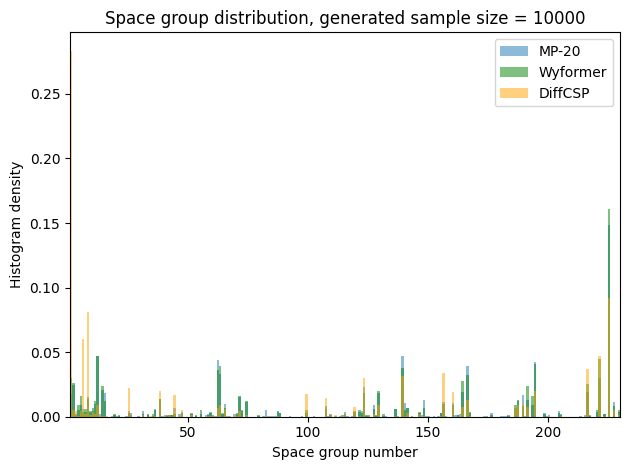

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#ax.step(mp_20_sgs[1][:-1], mp_20_sgs[0] / mp_20_sgs[0].sum(), label='MP-20', where='mid', alpha=0.5)
ax.hist(mp_20.spacegroup_number, bins=range(1, 231), alpha=0.5, label='MP-20', density=True)
ax.hist(generated['WyFormer'].spacegroup_number, bins=range(1, 231), alpha=0.5, label='Wyformer', density=True, color="green")
ax.hist(generated['DiffCSP'].spacegroup_number, bins=range(1, 231), alpha=0.5, label='DiffCSP', density=True, color="orange")
#ax.hist(generated['wyformer-diffcsp'].spacegroup_number, bins=range(1, 231), alpha=0.5, label='Wyformer-DiffCSP', density=True)
ax.set_xlabel('Space group number')
ax.set_ylabel('Histogram density')
ax.legend()
ax.set_xlim(1, 230)
ax.set_title('Space group distribution, generated sample size = 10000')
fig.tight_layout()
fig.savefig('plots/ICLR_rebuttal/space_groups_all.pdf')

In [6]:
sg_order = np.argsort(mp_20_sgs[0])[::-1]
wyformer_sgs = np.histogram(generated['WyFormer'].spacegroup_number, bins=range(1, 231))
wyformer_diffcsp_sgs = np.histogram(generated['WyForDiffCSP++'].spacegroup_number, bins=range(1, 231))
diffcsp_sgs = np.histogram(generated['DiffCSP'].spacegroup_number, bins=range(1, 231))

In [7]:
import pyxtal

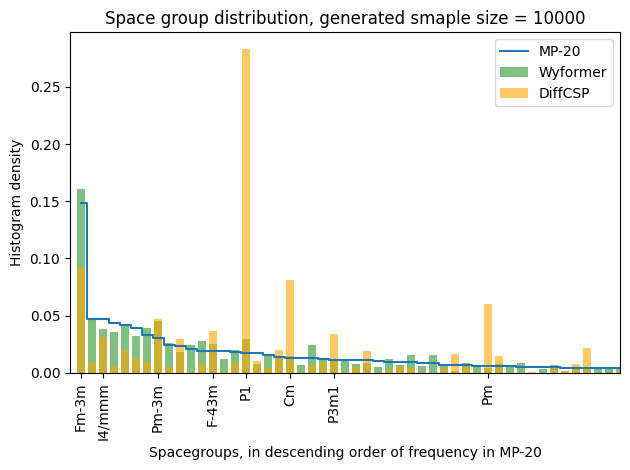

In [8]:
fig, ax = plt.subplots()

#ax.bar(mp_20_sgs[1][:-1], mp_20_sgs[0][sg_order] / mp_20_sgs[0].sum(), alpha=0.5, label='MP-20')
ax.bar(wyformer_sgs[1][:-1], wyformer_sgs[0][sg_order] / wyformer_sgs[0].sum(), alpha=0.5, label='Wyformer', color='green')
#ax.bar(wyformer_diffcsp_sgs[1][:-1], wyformer_diffcsp_sgs[0][sg_order] / wyformer_diffcsp_sgs[0].sum(), alpha=0.5, label='Wyformer-DiffCSP')
ax.bar(diffcsp_sgs[1][:-1], diffcsp_sgs[0][sg_order] / diffcsp_sgs[0].sum(), alpha=0.6, label='DiffCSP', color='orange')
ax.step(mp_20_sgs[1][:-1], mp_20_sgs[0][sg_order] / mp_20_sgs[0].sum(), label='MP-20', where='mid')
chosen_groups_ticks = (diffcsp_sgs[0][sg_order] / diffcsp_sgs[0].sum() > 0.03)
ax.set_xticks(np.arange(1, 230)[chosen_groups_ticks])
ax.set_xticklabels([pyxtal.Group(g).symbol for g in np.arange(1, 230)[sg_order][chosen_groups_ticks]], rotation=90)
ax.set_xlabel('Spacegroups, in descending order of frequency in MP-20')
ax.set_xlim(0, 50)
ax.set_ylabel('Histogram density')
ax.set_title('Space group distribution, generated smaple size = 10000')
ax.legend()
fig.tight_layout()
fig.savefig('plots/ICLR_rebuttal/space_groups_top50.pdf');

In [9]:
import matplotlib

10


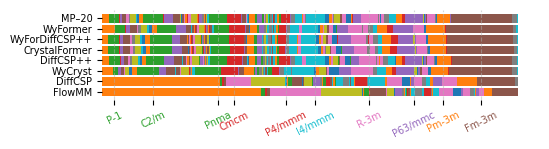

In [10]:
font = {'size': 7}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(5.50107, 1.5))
fractions = {method: data.spacegroup_number.value_counts().sort_index() / len(data)
             for method, data in generated.items()}
fractions['MP–20'] = mp_20.spacegroup_number.value_counts().sort_index() / len(mp_20)
choosen_sgs = fractions['MP–20'].loc[fractions['MP–20'] > 2.1e-2].index
print(len(choosen_sgs))
mp_20_positions = fractions['MP–20'].cumsum() - fractions['MP–20'] / 2
cmap = matplotlib.colormaps['tab10']
for i, (method, segments) in enumerate(fractions.items()):
    start = 0  # Starting position of each segment
    for space_group in range(1, 231):
        if space_group not in segments:
            continue
        ax.barh(i, segments.at[space_group], left=start, color=cmap(space_group % cmap.N), edgecolor='none')
        start += segments.at[space_group]

ax.set_yticks(range(len(fractions)))
ax.set_yticklabels(fractions.keys())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks(mp_20_positions[choosen_sgs])
ax.set_xticklabels([pyxtal.Group(g).symbol for g in choosen_sgs], rotation=26)
for tick, space_group in zip(ax.xaxis.get_ticklabels(), choosen_sgs):
    tick.set_color(cmap(space_group % cmap.N))
ax.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
fig.savefig('plots/ICLR_rebuttal/space_groups_horizontal.pdf')

In [28]:
fractions['MP–20'].sort_values(ascending=False).head(11).sum()

0.49914877622764153